## DATASET COMPOSITION ANALYSIS

In [189]:
truth = "../../../Bio_Project/SRR184065/truth/SRR1804065_truth.tsv"

In [190]:
def get_num_read(path):
    
    truth = open(path, 'r')
    
    num_read = 0
    for line in truth:
        num_read = num_read + 1
    
    truth.close()
    
    return num_read
    
def get_label_species_dict(path):
    
    truth = open(path, 'r')
    
    # dict with {key: value} pairs where key = label and value = species
    truth_dict = {}

    for line in truth:
        
        species = ""
        item_list = line.split()
        num_item = len(item_list)
        
        index = 2
        while (index < num_item):
            species = species + " " + item_list[index]
            index = index + 1
                
        truth_dict[item_list[1]] = species
        
    truth.close()

    return truth_dict 

def get_species_occ_dict(path):
    
    truth = open(path, 'r')
    
    # dict with {key: value} pairs where key = label and value = occurrences of the label
    species_occ_dict = {}

    for line in truth:
        
        item_list = line.split()
        
        if item_list[1] not in species_occ_dict.keys():
            species_occ_dict[item_list[1]] = 1
        
        else:
            species_occ_dict[item_list[1]] = species_occ_dict[item_list[1]] + 1
        
    truth.close()
    
    sorted_tuples = sorted(species_occ_dict.items(), key=lambda item: item[1], reverse = True)

    # sort the label-species dict
    species_occ_dict = {k: v for k, v in sorted_tuples}
    
    return species_occ_dict 


def get_species_name(label, truth_dict):
    
    species_name = ""
    
    if label in truth_dict.keys():
        species_name = truth_dict[label]
    
    return species_name

def get_top_k_species(label_species_dict, species_occ_dict, k):
    
    i = 0
    
    top_k_list = []

    for label, occ in species_occ_dict.items():

        if (i < k):
            species_name = get_species_name(label, truth_dict)
            top_k_list.append([label, species_name, occ])

        else:
            break

        i = i + 1
        
    return top_k_list
    

def get_species_percentage(label_species_occ_list, num_read):
    
    species_percentage_list = []
    partial_percentage = 0
    for item in label_species_occ_list:
        percentage = round(item[2]/num_read*100, 2)
        partial_percentage = round(partial_percentage + percentage, 2)
        species = item[1]
        species_percentage_list.append([species, percentage])
    
    if partial_percentage < 100:
        species_percentage_list.append(['other', round(100 - partial_percentage, 2)])
        
    return species_percentage_list

def get_pie_chart(species_percentage_list, colors):
    
    mylabels = []
    y = []
    
    for item in species_percentage_list:
        mylabels.append(item[0])
        y.append(item[1])
    
    fig = plt.gcf()
    fig.set_size_inches(11,11) 
    
    #explode = []
    #for i in range(len(species_percentage_list)):
        #explode.append(0.1)
    #explode = (0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1)
    
    plt.pie(y, labels = mylabels, colors = colors, #explode = explode,
            autopct='%1.1f%%')
    #plt.legend(loc='best', title = "Species:")
    
    plt.show()
    
    return 

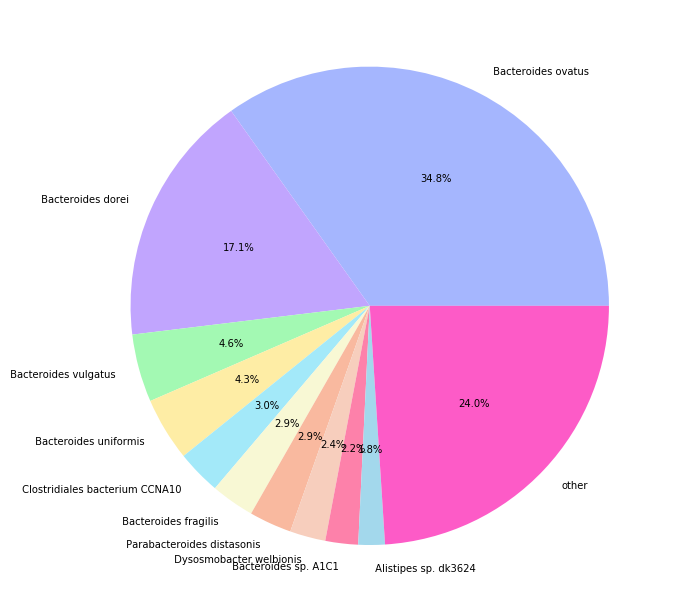

In [191]:
num_read = get_num_read(truth)

label_species_dict = get_label_species_dict(truth)

species_occ_dict = get_species_occ_dict(truth)

top_10_species_list = get_top_k_species(label_species_dict, species_occ_dict, 10)

top_10_species_percentage_list = get_species_percentage(top_10_species_list, num_read)

colors = ['#a5b6fe', '#c1a5fe', '#a3f9b3', '#feeda5', '#a3e9f9', '#f8f8d4', '#f9b99f', '#f7cebd', '#fd81aa', '#a3d8ec', '#fd5bc7']

get_pie_chart(top_10_species_percentage_list, colors)